In [3]:
import pandas as pd
import numpy as np
import scipy
import operator as op
from functools import reduce
import random
import matplotlib.pyplot as plt

In [4]:
# v = probability of vaping indep of peer pressure
# sf = number of smoking friends
# sf_data = list of probilibities of having sf number of friends who smoke
# n = number of friends
# ii = income indexThe 

# Part 1

In [5]:
XfriendsSmoke = [.138,.131,.19,.195,.12,.225,0,0,0,0,0,0,0,0,0]
XfriendsTotal = [.02,.06,.08,.11,.11,.17,.045,.045,.045,.045,.27]
GlobalProbOfVaping = .134092
# GlobalProbOfVaping = .26


In [6]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

In [7]:
def PP(prob, sf, nf):
    sxied = XfriendsSmoke[sf]
    return (prob * sxied) / (ncr(nf, sf) * pow(GlobalProbOfVaping, sf) * pow(1-GlobalProbOfVaping, nf - sf))

In [8]:
PplPerGeneration = 50000

iterations = 1

In [9]:
populationFriends = [[] for n in range(PplPerGeneration)]
populationVaping = [random.random()<GlobalProbOfVaping for n in range(PplPerGeneration)]

In [10]:
def iteration():
    global iterations
    for person in range(PplPerGeneration):
        fof = random.random()
        for xh in range(len(XfriendsTotal)):
            fof -= XfriendsTotal[xh]
            if fof < 0:
                friends = xh
        vapingfriends = 0
        for friendnum in range(friends):
            friend = random.randint(0,PplPerGeneration*iterations)
            if populationVaping[friend]:
                vapingfriends = vapingfriends + 1
        populationVaping.append(random.random()<PP(GlobalProbOfVaping,vapingfriends,friends))
    iterations += 1

In [11]:
def prop_vaping(populationVaping, iterations, pplPerGen):
        
    filthyVapers = 0
    for guy in range((iterations-1)*pplPerGen,iterations*pplPerGen):
        if populationVaping[guy]: filthyVapers += 1

    return float(filthyVapers)/(pplPerGen)

In [12]:
prop_over_time = []

prop_over_time.append(prop_vaping(populationVaping, iterations, PplPerGeneration))
for x in range(10):
    iteration()
    prop_over_time.append(prop_vaping(populationVaping, iterations, PplPerGeneration))

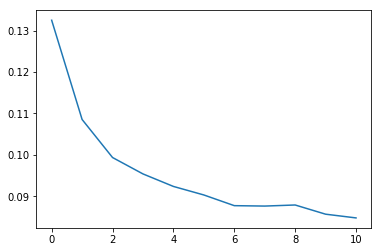

In [13]:
plt.plot(prop_over_time)

# Part 2

In [14]:
alcohol = pd.read_csv('data/alcohol.csv')
nicotine = pd.read_csv('data/nicotine.csv')
weed = pd.read_csv('data/weed.csv')
opiod = pd.read_csv('data/opiod.csv')
nf = 9
max_sf = 5

In [15]:
def prob_dist(prob, nf, max_sf):
    probs = []

    for x in range(max_sf):
        probs.append(PP(prob,x,nf))
        
    return probs

In [16]:
def get_prob(drug,pov,age):
    df = None
    
    drug = drug.lower()
    if 'alc' in drug:
        df = alcohol
    elif 'nic' in drug:
        df = nicotine
    elif 'weed' in drug:
        df = weed
    elif 'op' in drug:
        df = opiod
        
    
    return df.iloc[pov][age+1]
        

In [17]:
def get_prob_dist(drug, pov, age, nf, max_sf):
    return prob_dist(get_prob(drug,pov,age),nf,max_sf)

In [23]:
def plot_incom_dists(drug, age, title):
    plt.xlabel('# of Friends Doing Drug')
    plt.ylabel('Probility of Doing Drug')
    
    probs = get_prob_dist(drug, 0, age, nf, max_sf)
    plt.plot(probs, label='<100% Poverty')

    probs = get_prob_dist(drug, 1, age, nf, max_sf)
    plt.plot(probs, label='100-199% Poverty')

    probs = get_prob_dist(drug, 2, age, nf, max_sf)
    plt.plot(probs, label='200%+ Poverty')
    
    plt.legend(loc='upper left')
    plt.title(title)

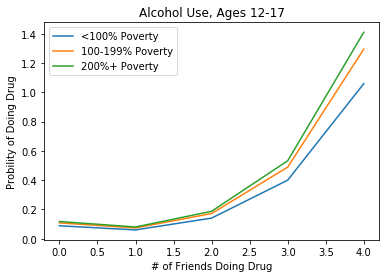

In [24]:
plot_incom_dists('alc', 0, 'Alcohol Use, Ages 12-17')

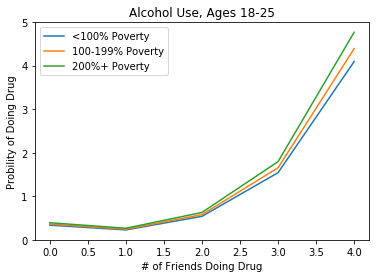

In [25]:
plot_incom_dists('alc', 1, 'Alcohol Use, Ages 18-25')

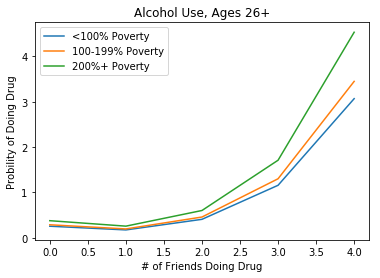

In [26]:
plot_incom_dists('alc', 2, 'Alcohol Use, Ages 26+')

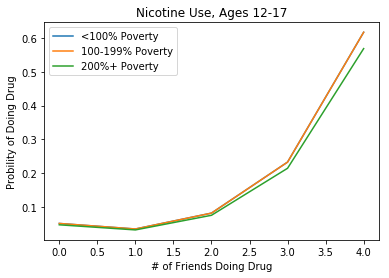

In [27]:
plot_incom_dists('nic', 0, 'Nicotine Use, Ages 12-17')

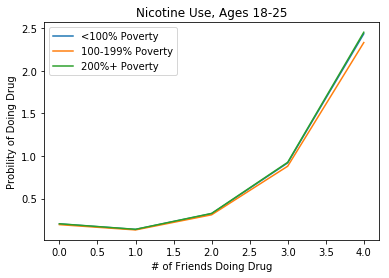

In [28]:
plot_incom_dists('nic', 1, 'Nicotine Use, Ages 18-25')

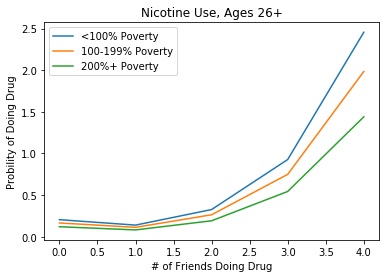

In [29]:
plot_incom_dists('nic', 2, 'Nicotine Use, Ages 26+')

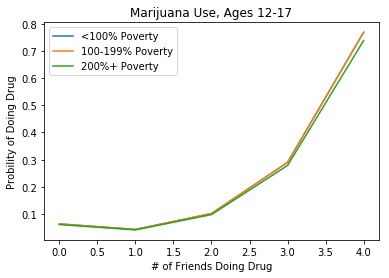

In [30]:
plot_incom_dists('weed', 0, 'Marijuana Use, Ages 12-17')

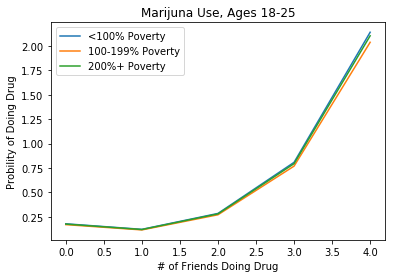

In [31]:
plot_incom_dists('weed', 1, 'Marijuna Use, Ages 18-25')

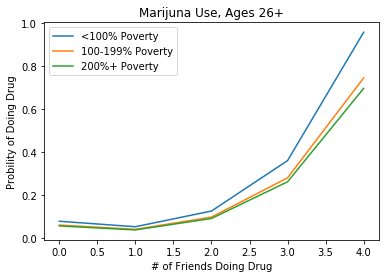

In [32]:
plot_incom_dists('weed', 2, 'Marijuna Use, Ages 26+')

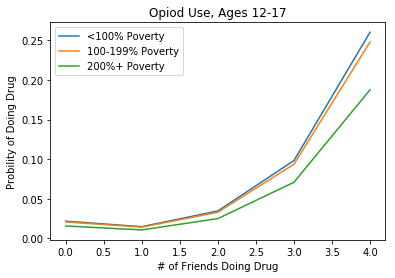

In [33]:
plot_incom_dists('op', 0, 'Opiod Use, Ages 12-17')

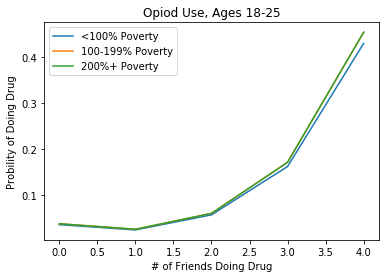

In [34]:
plot_incom_dists('op', 1, 'Opiod Use, Ages 18-25')

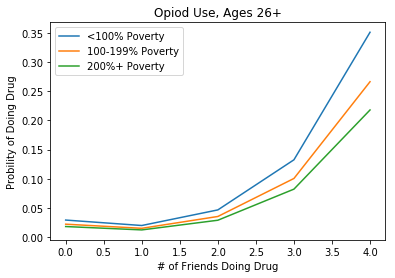

In [35]:
plot_incom_dists('op', 2, 'Opiod Use, Ages 26+')